1. Calculo de probabilidad 

In [2]:
#punto 1
import numpy as np

def prob(tomadas,despues):
 N=int(1e6)
 espadas = 13-tomadas
 cartasotras = 39
 logrado = 0

 for i in range(N):
  deck = ['espada']*(espadas) + ['otro']*(cartasotras)
  np.random.shuffle(deck)
  take=deck[:despues]

  if all(elemento == 'espada' for elemento in take):
    logrado+=1
 return logrado/N
# a) Probabilidad de que las siguientes 3 cartas también sean espadas después de sacar 2 espadas
print(f"a) {prob(2, 3)}")

# b) Probabilidad de que las siguientes 2 cartas también sean espadas después de sacar 3 espadas
print(f"b) {prob(3, 2)}")

# c) Probabilidad de que la siguiente carta también sea una espada después de sacar 4 espadas
print(f"c) {prob(4, 1)}")

a) 0.008422
b) 0.038165
c) 0.187264


In [3]:
#punto 2
import numpy as np
def simular_gripe(n_simulaciones):
    # Probabilidades dadas
    prob_exposicion = 0.6
    prob_enfermar_si_inoculado = 0.2
    prob_enfermar_si_no_inoculado = 0.9

    enfermos = 0

    for _ in range(n_simulaciones):
        # Simular si las personas están expuestas a la gripe
        expuesto_inoculado = np.random.rand() < prob_exposicion
        expuesto_no_inoculado = np.random.rand() < prob_exposicion

        # Simular si las personas enferman después de la exposición
        enferma_inoculado = expuesto_inoculado and (np.random.rand() < prob_enfermar_si_inoculado)
        enferma_no_inoculado = expuesto_no_inoculado and (np.random.rand() < prob_enfermar_si_no_inoculado)

        # Si al menos uno de ellos se enferma, incrementar el contador
        if enferma_inoculado or enferma_no_inoculado:
            enfermos += 1

    # Calcular la probabilidad de que al menos uno se enferme
    prob_enfermar = enfermos / n_simulaciones

    return prob_enfermar

# Ejecutar la simulación con un gran número de simulaciones para obtener una estimación precisa
n_simulaciones = 1000000
prob = simular_gripe(n_simulaciones)
print(f"La probabilidad estimada de que al menos uno se enferme es {prob}")


La probabilidad estimada de que al menos uno se enferme es 0.594291


2. Distribuciones de probabilidad discretas

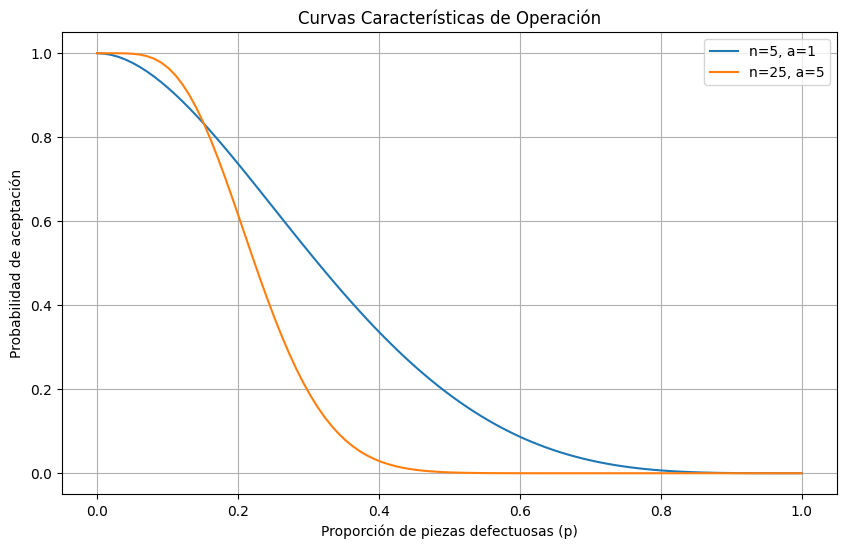

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Definir los planes de muestreo
planes = [(5, 1), (25, 5)]

# Definir el rango de p
p_values = np.linspace(0, 1, 100)

# Crear una figura para las gráficas
plt.figure(figsize=(10, 6))

# Para cada plan de muestreo
for n, a in planes:
    # Calcular las probabilidades de aceptación para cada valor de p
    prob_aceptacion = [binom.cdf(a, n, p) for p in p_values]
    
    # Graficar las curvas caracteristicas de operación
    plt.plot(p_values, prob_aceptacion, label=f'n={n}, a={a}')

# Añadir detalles a la gráfica
plt.title('Curvas Características de Operación')
plt.xlabel('Proporción de piezas defectuosas (p)')
plt.ylabel('Probabilidad de aceptación')
plt.legend()
plt.grid(True)
plt.show()
print('Si fuera un vendedor que produce lotes con una fracción defectuosa que va de p = 0 a p = 0.10, preferiría el plan de muestreo que tiene la mayor probabilidad de aceptación para estos valores de p. el cual es el que tiene n=25, a=5')
print('Si fuera un comprador que desea protegerse contra la aceptación de lotes con una fracción defectuosa que exceda de p = 0.30, preferiría el plan de muestreo que tiene la menor probabilidad de aceptación para estos valores de p, lo cual es el que tiene n=25, a=5')

In [12]:
from scipy.stats import poisson

# Parte a)
n = 0
while poisson.pmf(n, mu=1) > 0.01:
    n += 1
print(f"El menor valor de n tal que la probabilidad de que haya al menos n desconexiones en menos de un período de 4 horas es menor que 0.01 es: {n}")

# Parte b)
h = 0
while poisson.pmf(0, mu=h/4) > 0.02:
    h += 1
print(f"El menor valor del número de horas h tal que la probabilidad de que no haya desconexiones en h horas sea menor que 0.02 es: {h}")

# Parte c)
prob_c = 3 * poisson.pmf(0, mu=1) * (1 - poisson.pmf(0, mu=1))**2
print(f"La probabilidad de que en 3 períodos consecutivos de 4 horas, haya solamente un período de 4 horas sin desconexiones es: {prob_c}")

# Parte d)
prob_d = poisson.pmf(3, mu=3)
print(f"La probabilidad de que el número de desconexiones en 3 períodos consecutivos de 4 horas sea igual al número esperado de desconexiones en 3 períodos consecutivos de 4 horas es: {prob_d}")


El menor valor de n tal que la probabilidad de que haya al menos n desconexiones en menos de un período de 4 horas es menor que 0.01 es: 5
El menor valor del número de horas h tal que la probabilidad de que no haya desconexiones en h horas sea menor que 0.02 es: 16
La probabilidad de que en 3 períodos consecutivos de 4 horas, haya solamente un período de 4 horas sin desconexiones es: 0.44098782919824264
La probabilidad de que el número de desconexiones en 3 períodos consecutivos de 4 horas sea igual al número esperado de desconexiones en 3 períodos consecutivos de 4 horas es: 0.22404180765538775


3. Distribuciones de probabilidad continuas

In [6]:
import sympy as sym

x = sym.symbols('x')
f = x**(2)/3

integral_1 = sym.integrate(f, (x, 0, 1))
integral_2 = sym.integrate(f, (x, 1, 2))

print(f"El resultado de la primera integral es: {integral_1}")
print(f"El resultado de la segunda integral es: {integral_2}")


El resultado de la primera integral es: 1/9
El resultado de la segunda integral es: 7/9


In [11]:
import scipy.stats as stats

mu = 78  # media
sigma = 6  # desviación estándar (la raíz cuadrada de la varianza)

dist = stats.norm(loc=mu, scale=sigma)

# a) Probabilidad de que una persona alcance calificaciones mayores de 72
p_a = 1 - dist.cdf(72)
print(f"a) La probabilidad de que una persona alcance calificaciones mayores de 72 es {p_a}")

# b) Calificación mínima para estar en el 10% más alto
calif_b = dist.ppf(0.9)
print(f"b) La calificación mínima para estar en el 10% más alto es {calif_b}")

# c) Punto límite para pasar el examen si se desea pasar al 28.1% más alto
calif_c = dist.ppf(1 - 0.281)
print(f"c) El punto límite para pasar el examen si se desea pasar al 28.1% más alto es {calif_c}")

# d) Proporción de estudiantes con calificaciones de 5 o más puntos arriba del corte del 25% más bajo
corte_25 = dist.ppf(0.25)
p_d = 1 - dist.cdf(corte_25 + 5)
print(f"d) La proporción de estudiantes con calificaciones de 5 o más puntos arriba del corte del 25% más bajo es {p_d}")

# e) Probabilidad de que la calificación de un estudiante exceda de 84 dado que ya excede de 72
p_e = (1 - dist.cdf(84)) / (1 - dist.cdf(72))
print(f"e) La probabilidad de que la calificación de un estudiante exceda de 84 dado que ya excede de 72 es {p_e}")


a) La probabilidad de que una persona alcance calificaciones mayores de 72 es 0.8413447460685429
b) La calificación mínima para estar en el 10% más alto es 85.6893093932676
c) El punto límite para pasar el examen si se desea pasar al 28.1% más alto es 81.47924035456623
d) La proporción de estudiantes con calificaciones de 5 o más puntos arriba del corte del 25% más bajo es 0.43689605516226615
e) La probabilidad de que la calificación de un estudiante exceda de 84 dado que ya excede de 72 es 0.18857341734506025


4. Cadenas de Markov

In [16]:
import numpy as np


probabilidades = np.array([
    [0.4, 0.25, 0.3, 0.1],
    [0.2, 0.25, 0.3, 0.1],
    [0.2, 0.25, 0.1, 0.1],
    [0.2, 0.25, 0.3, 0.7]
])

mapeo_bases = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'U':3}

probabilidades_a_priori = np.array([0.25, 0, 0.5, 0.25])


secuencia = 'TGCTCAAA'


probabilidad_secuencia = probabilidades_a_priori[mapeo_bases[secuencia[0]]]

for i in range(1, len(secuencia)):
    indice_base_actual = mapeo_bases[secuencia[i-1]]
    indice_base_siguiente = mapeo_bases[secuencia[i]]

    probabilidad_secuencia *= probabilidades[indice_base_siguiente][indice_base_actual]
print(f'La probabilidad de la secuencia {secuencia} es {probabilidad_secuencia}')

probabilidadesE = np.array([
    [0.01, 0., 0., 0.7],
    [0.05, 0.01, 0.9, 0.],
    [0.05, 0.09, 0.1, 0.1],
    [0.8, 0., 0., 0.2]
])

secuenciagr = 'ACGAGUUU'
for i in range(0, len(secuenciagr)):
    indice_base_actual = mapeo_bases[secuencia[i]]
    indice_base_siguiente = mapeo_bases[secuenciagr[i]]
    probabilidad_secuencia *= probabilidadesE[indice_base_siguiente][indice_base_actual]
print(f'La probabilidad de la secuencia {secuenciagr} es {probabilidad_secuencia}')


La probabilidad de la secuencia TGCTCAAA es 7.500000000000001e-06
La probabilidad de la secuencia ACGAGUUU es 1.3716864000000003e-08
